In [4]:
# Automotive Trend Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
car_dict = pd.read_excel("DS1_C4_S9_Car_Data Dictionary.xlsx")
car_data = pd.read_excel("DS1_C4_S9_Car_Data.xlsx", index_col=0)

# Separate numerical and categorical
numeric_cols = []
categorical_cols = []

for col in car_data.columns:
    if car_data[col].dtype == "object":
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# Replace missing values
for col in numeric_cols:
    car_data[col] = car_data[col].fillna(car_data[col].mean())

for col in categorical_cols:
    car_data[col] = car_data[col].fillna("Not Available")

Numeric Columns: ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Height_mm', 'Length_mm', 'Width_mm', 'Doors', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque', 'Seating_Capacity']
Categorical Columns: ['Make', 'Model', 'Variant', 'Fuel_Type', 'Body_Type', 'Kerb_Weight', 'Central_Locking', 'Child_Safety_Locks', 'Hill_Assist', 'Drive_Modes', 'High_Speed_Alert_System', 'ABS_(Anti-lock_Braking_System)', 'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning', 'Fasten_Seat_Belt_Warning']


In [7]:
# Task 1

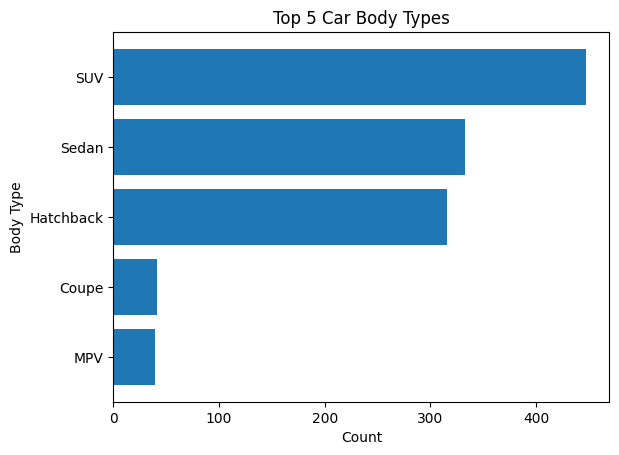

In [8]:
body_types = car_data["Body_Type"].value_counts().head(5)

plt.barh(body_types.index, body_types.values)
plt.title("Top 5 Car Body Types")
plt.xlabel("Count")
plt.ylabel("Body Type")
plt.gca().invert_yaxis()
plt.show()


In [9]:
# Task 2

In [10]:
# Task 2: Cars with all 5 drive modes
cond = car_data["Drive_Modes"].fillna("").str.contains("Normal, Comfort, Eco, Sport, Power Mode")
filtered_cars = car_data[cond]

print("Cars with all 5 drive modes:", filtered_cars.shape[0])
filtered_cars.head()


Cars with all 5 drive modes: 2


,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,Length_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
S. No.,,,,,,,,,,,,,,,,,,,,,
321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,85.0,Petrol,1740.0,5052.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport, Power Mode",Yes,Yes,2830 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes
330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,82.0,Petrol,1485.0,5302.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport, Power Mode",Yes,Yes,Not Available,"Driver head airbag, Drive side airbag, Curtain...",Yes,Yes


In [11]:
# Task 3: Handle outliers in City Mileage and find Top 10 fuel-efficient makes

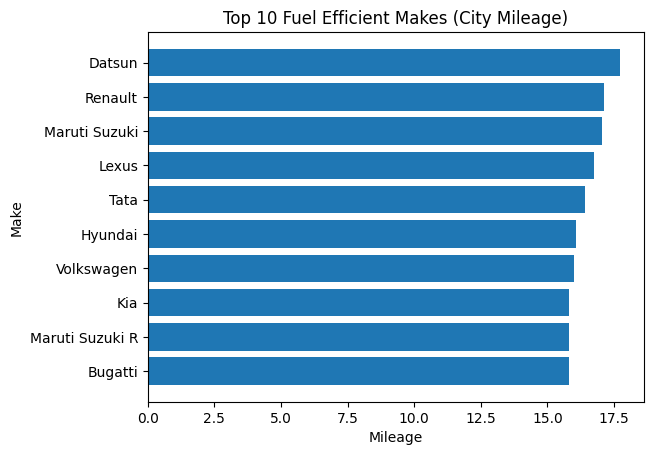

In [12]:
Q1 = car_data["City_Mileage_km_litre"].quantile(0.25)
Q3 = car_data["City_Mileage_km_litre"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

car_data['City_Mileage_km_litre'] = car_data['City_Mileage_km_litre'].clip(lower, upper)

top_10_make = car_data.groupby("Make")["City_Mileage_km_litre"].mean().sort_values(ascending=False).head(10).round(2)

plt.barh(top_10_make.index, top_10_make.values)
plt.title("Top 10 Fuel Efficient Makes (City Mileage)")
plt.xlabel("Mileage")
plt.ylabel("Make")
plt.gca().invert_yaxis()
plt.show()

In [13]:
# Task 4

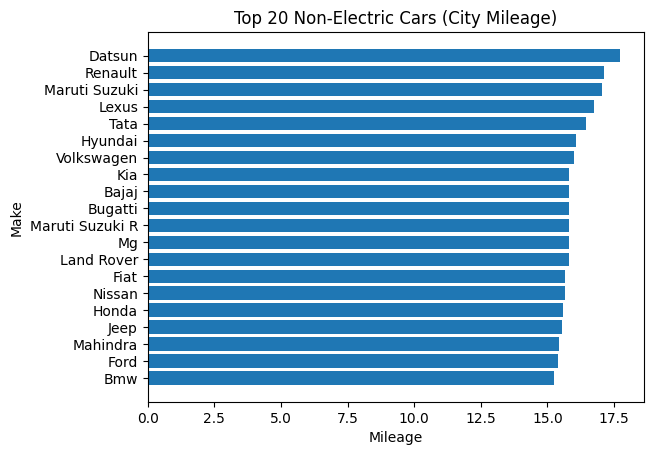

In [14]:
non_electric = car_data[car_data["Fuel_Type"].str.strip() != "Electric"]

top_20 = non_electric.groupby("Make")["City_Mileage_km_litre"].mean().nlargest(20).round(2)

plt.barh(top_20.index, top_20.values)
plt.title("Top 20 Non-Electric Cars (City Mileage)")
plt.xlabel("Mileage")
plt.ylabel("Make")
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Task 5

In [16]:
brands = ['Hyundai', 'Mahindra', 'Renault', 'Skoda']
filtered = car_data[car_data['Make'].isin(brands)]

print("Mean City Mileage:\n", filtered.groupby("Make")["City_Mileage_km_litre"].mean().round(2))
print("\nMedian City Mileage:\n", filtered.groupby("Make")["City_Mileage_km_litre"].median().round(2))

print("\nMean Highway Mileage:\n", filtered.groupby("Make")["Highway_Mileage_km_litre"].mean().round(2))
print("\nMedian Highway Mileage:\n", filtered.groupby("Make")["Highway_Mileage_km_litre"].median().round(2))


Mean City Mileage:
 Make
Hyundai     16.09
Mahindra    15.57
Renault     17.13
Skoda       14.57
Name: City_Mileage_km_litre, dtype: float64

Median City Mileage:
 Make
Hyundai     15.82
Mahindra    15.82
Renault     19.00
Skoda       15.10
Name: City_Mileage_km_litre, dtype: float64

Mean Highway Mileage:
 Make
Hyundai     17.33
Mahindra    17.48
Renault     17.08
Skoda       17.19
Name: Highway_Mileage_km_litre, dtype: float64

Median Highway Mileage:
 Make
Hyundai     16.88
Mahindra    16.88
Renault     16.88
Skoda       16.88
Name: Highway_Mileage_km_litre, dtype: float64


In [17]:
# Task 6: Stacked bar chart

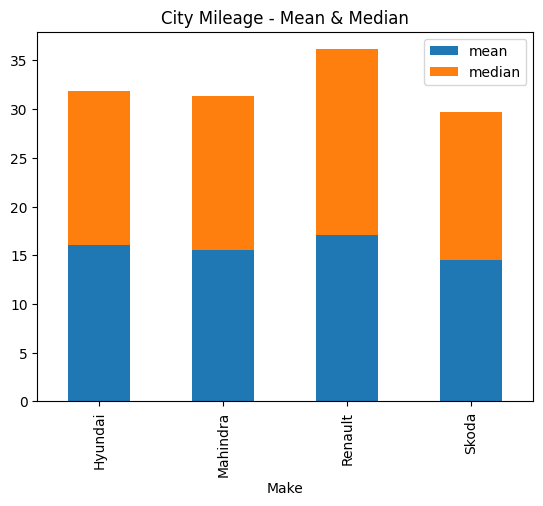

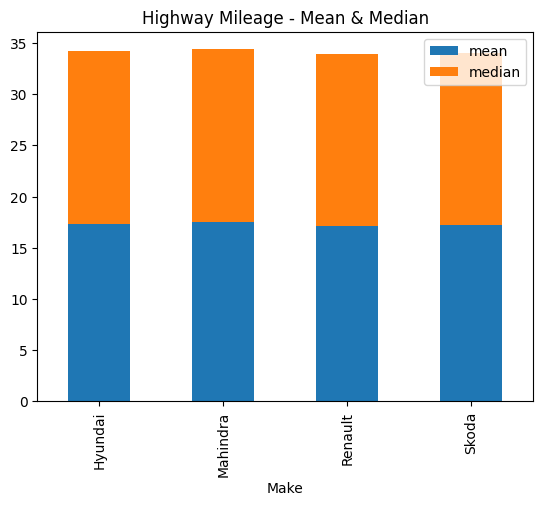

In [18]:
city_stats = filtered.groupby('Make')["City_Mileage_km_litre"].agg(['mean','median'])
city_stats.plot(kind='bar', stacked=True)
plt.title("City Mileage - Mean & Median")
plt.show()

highway_stats = filtered.groupby('Make')["Highway_Mileage_km_litre"].agg(['mean','median'])
highway_stats.plot(kind='bar', stacked=True)
plt.title("Highway Mileage - Mean & Median")
plt.show()


In [19]:
# Task 7: Avg mileage for all makes

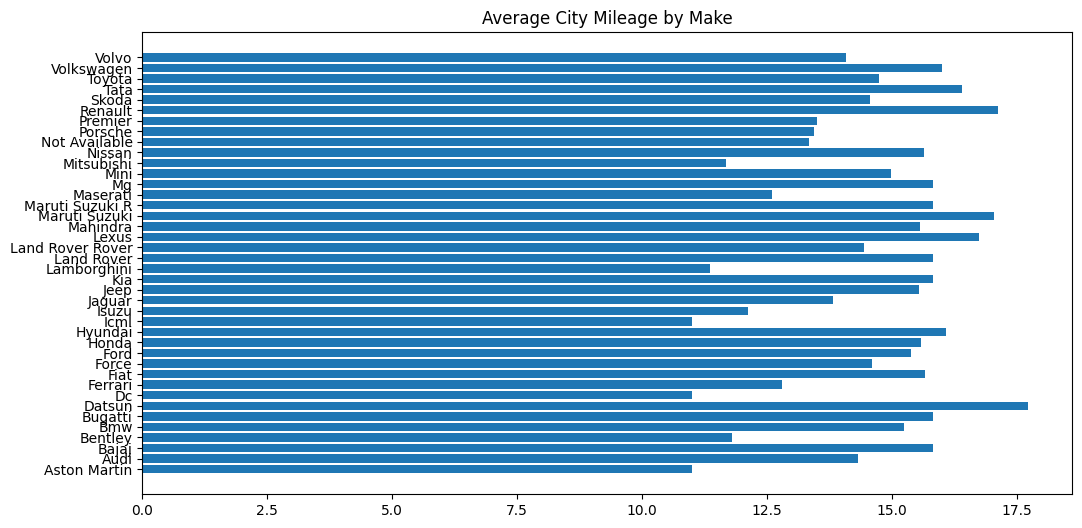

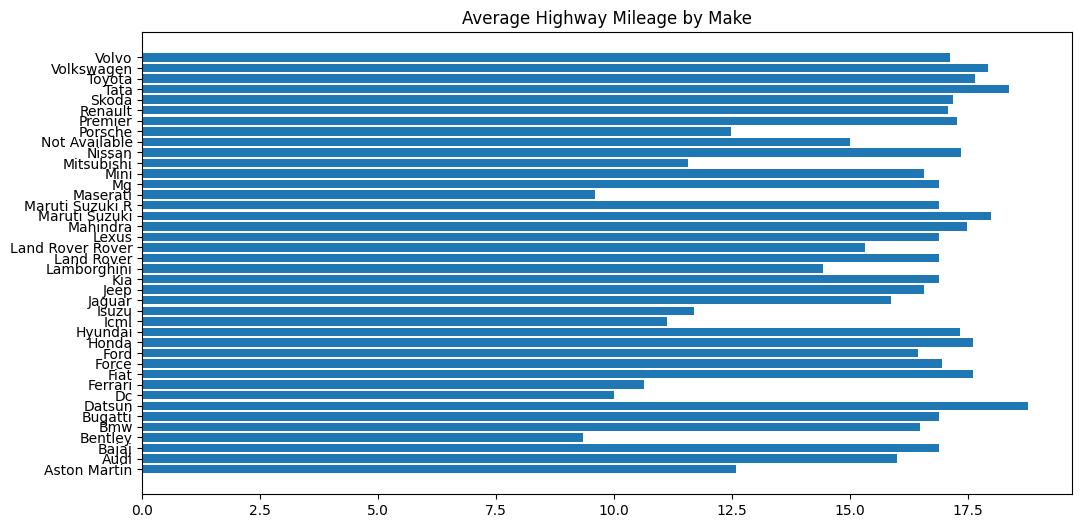

In [20]:
avg_city = car_data.groupby('Make')["City_Mileage_km_litre"].mean().round(2)
avg_high = car_data.groupby('Make')["Highway_Mileage_km_litre"].mean().round(2)

plt.figure(figsize=(12,6))
plt.barh(avg_city.index, avg_city.values)
plt.title("Average City Mileage by Make")
plt.show()

plt.figure(figsize=(12,6))
plt.barh(avg_high.index, avg_high.values)
plt.title("Average Highway Mileage by Make")
plt.show()


In [21]:
# Task 8: Displacement vs City Mileage

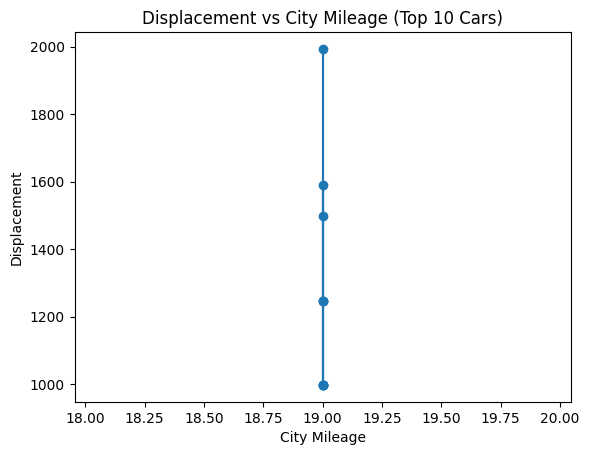

In [22]:
non_electric = car_data[car_data["Fuel_Type"] != "Electric"]
top_cars = non_electric.groupby("Model")[["City_Mileage_km_litre", "Displacement"]].max().sort_values(
    by="City_Mileage_km_litre", ascending=False).head(10)

plt.plot(top_cars["City_Mileage_km_litre"], top_cars["Displacement"], marker='o')
plt.title("Displacement vs City Mileage (Top 10 Cars)")
plt.xlabel("City Mileage")
plt.ylabel("Displacement")
plt.show()


In [23]:
# Task 9: Spread of fuel economy

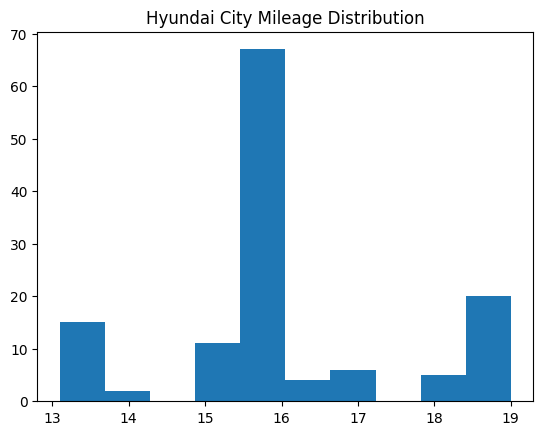

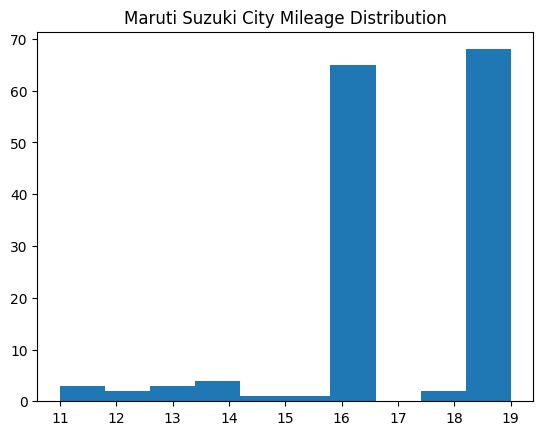

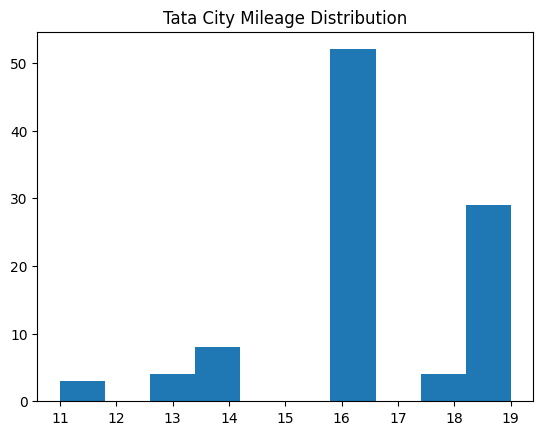

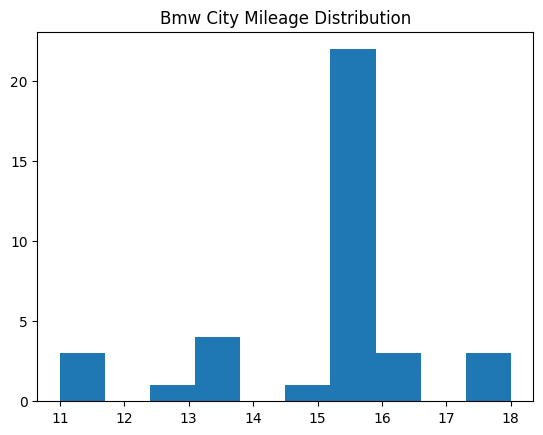

Skewness values: {'Hyundai': np.float64(0.304), 'Maruti Suzuki': np.float64(-0.726), 'Tata': np.float64(-0.294), 'Bmw': np.float64(-1.187)}
Highest Skewness: Hyundai


In [24]:
brands = ['Hyundai', 'Maruti Suzuki', 'Tata', 'Bmw']
skewness_dict = {}

for b in brands:
    series = car_data[car_data["Make"]==b]["City_Mileage_km_litre"]
    skewness_dict[b] = series.skew()
    plt.hist(series, bins=10)
    plt.title(f"{b} City Mileage Distribution")
    plt.show()

print("Skewness values:", {k: round(v,3) for k,v in skewness_dict.items()})
print("Highest Skewness:", max(skewness_dict, key=skewness_dict.get))


In [25]:
# Task 10: New dataframe

In [26]:
new_data = car_data[['Valves_Per_Cylinder','Kerb_Weight','Make','Displacement',
                     'Fuel_Tank_Capacity_litre','City_Mileage_km_litre',
                     'Highway_Mileage_km_litre','Power','Torque','Gross_Vehicle_Weight']]

new_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Valves_Per_Cylinder       1276 non-null   float64
 1   Kerb_Weight               1276 non-null   object 
 2   Make                      1276 non-null   object 
 3   Displacement              1276 non-null   float64
 4   Fuel_Tank_Capacity_litre  1276 non-null   float64
 5   City_Mileage_km_litre     1276 non-null   float64
 6   Highway_Mileage_km_litre  1276 non-null   float64
 7   Power                     1276 non-null   float64
 8   Torque                    1276 non-null   float64
 9   Gross_Vehicle_Weight      1276 non-null   object 
dtypes: float64(7), object(3)
memory usage: 109.7+ KB


In [27]:
# Task 11: Cleaning Kerb & Gross Vehicle Weight

In [28]:
cols = ['Kerb_Weight','Gross_Vehicle_Weight']

for c in cols:
    new_data[c] = new_data[c].astype(str).str.replace("kg","").replace(["Not Available","nan","Nan"],"0")
    def avg_weight(x):
        try:
            nums = [float(i) for i in x.split("-")]
            return sum(nums)/len(nums)
        except:
            return 0
    new_data[c] = new_data[c].apply(avg_weight).astype(float)*2.2


/tmp/ipython-input-4056928226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[c] = new_data[c].astype(str).str.replace("kg","").replace(["Not Available","nan","Nan"],"0")
/tmp/ipython-input-4056928226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[c] = new_data[c].apply(avg_weight).astype(float)*2.2
/tmp/ipython-input-4056928226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [29]:
# Task 12.1: Performance comparison

In [30]:
cols = ['Displacement','Cylinders','Valves_Per_Cylinder']
df_list = []

for c in cols:
    g = car_data.groupby("Make")[c]
    temp = pd.DataFrame({
        f"{c}_mean": g.mean(),
        f"{c}_median": g.median(),
        f"{c}_std": g.std(),
        f"{c}_cv": (g.std()/g.mean())*100
    })
    df_list.append(temp)

perf_df = pd.concat(df_list, axis=1).round(2)
perf_df.head()

,Displacement_mean,Displacement_median,Displacement_std,Displacement_cv,Cylinders_mean,Cylinders_median,Cylinders_std,Cylinders_cv,Valves_Per_Cylinder_mean,Valves_Per_Cylinder_median,Valves_Per_Cylinder_std,Valves_Per_Cylinder_cv
Make,,,,,,,,,,,,
Aston Martin,5038.33,5198.0,986.24,19.57,10.67,12.00,2.31,21.65,4.00,4.0,0.0,0.0
Audi,2256.35,1984.0,836.30,37.06,5.16,4.00,1.61,31.28,4.77,4.0,3.0,62.8
Bajaj,216.00,216.0,0.00,0.00,4.38,4.38,0.00,0.00,1.00,1.0,0.0,0.0
Bentley,5447.83,5974.0,1164.71,21.38,10.67,12.00,2.07,19.36,4.00,4.0,0.0,0.0
Bmw,2707.92,2979.0,924.57,34.14,5.46,6.00,1.61,29.47,4.00,4.0,0.0,0.0


In [31]:
# Task 12.2: Boxplot of displacement

/tmp/ipython-input-1393276092.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=new_data["Make"].unique(), patch_artist=True)


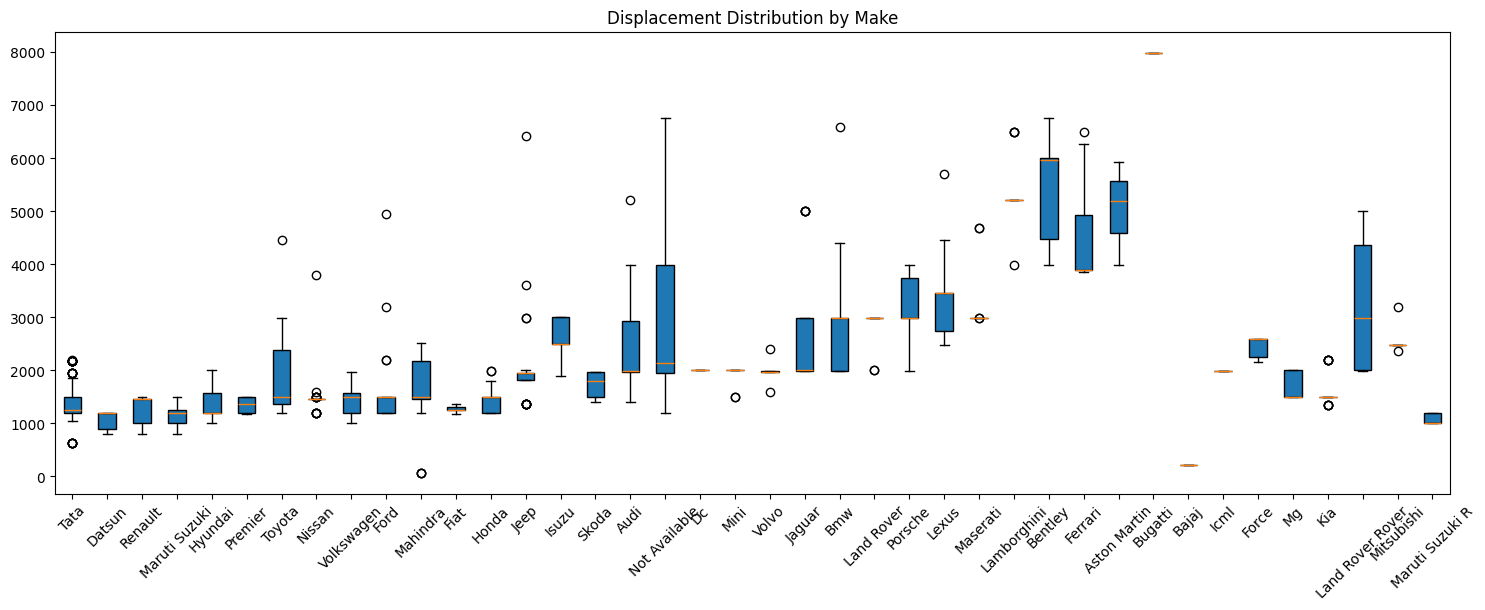

In [32]:
data_box = [new_data[new_data["Make"]==m]["Displacement"] for m in new_data["Make"].unique()]

plt.figure(figsize=(18,6))
plt.boxplot(data_box, labels=new_data["Make"].unique(), patch_artist=True)
plt.xticks(rotation=45)
plt.title("Displacement Distribution by Make")
plt.show()

In [33]:
# Task 13: Correlation analysis

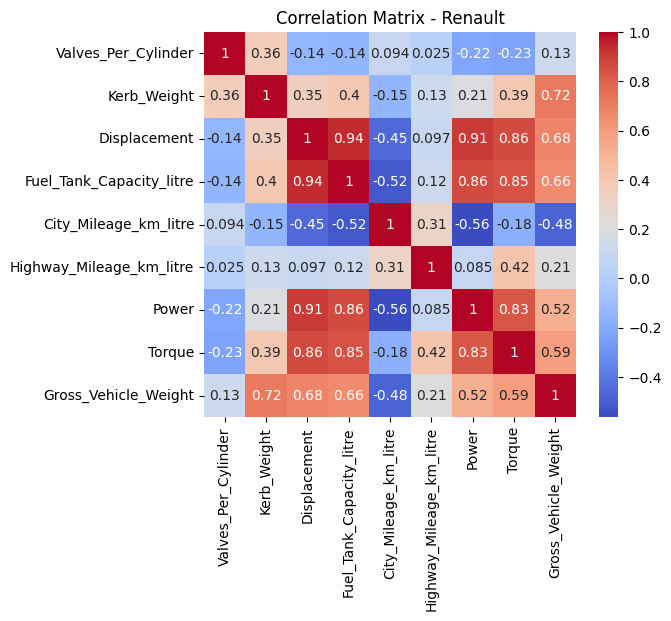

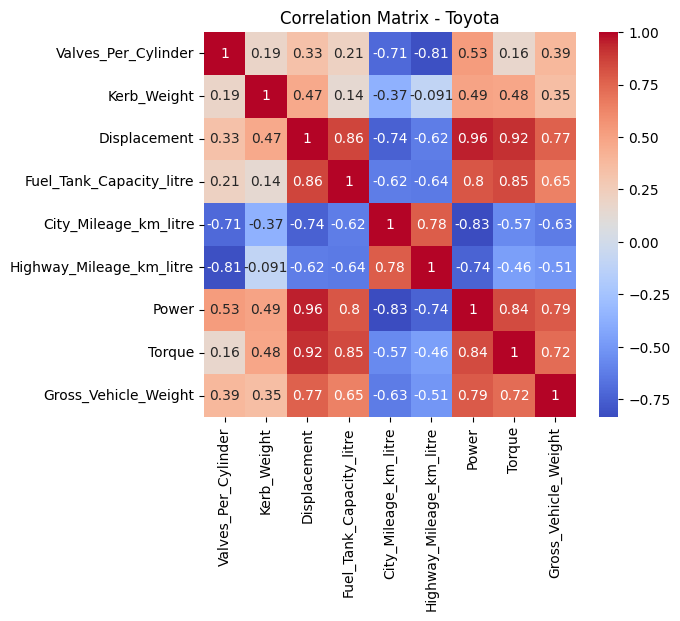

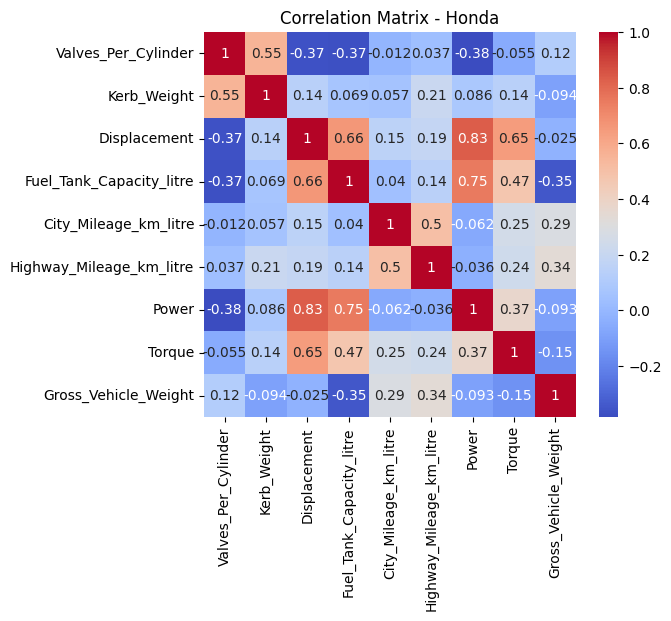

In [34]:
brands = ['Renault','Toyota','Honda']

for b in brands:
    df = new_data[new_data["Make"]==b].select_dtypes(include='number')
    corr = df.corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix - {b}")
    plt.show()


In [35]:
# Task 14: Cleaning weights & summary stats

In [36]:
cols = ['Kerb_Weight','Gross_Vehicle_Weight']
df_list = []

for c in cols:
    car_data[c] = car_data[c].astype(str).str.replace("kg","").replace(["Not Available","nan","Nan"],"0")
    def avg_weight(x):
        try:
            nums = [float(i) for i in x.split("-")]
            return sum(nums)/len(nums)
        except:
            return 0
    car_data[c] = car_data[c].apply(avg_weight).astype(float)*2.2

    g = car_data.groupby("Make")[c]
    df = pd.DataFrame({
        f"{c}_mean": g.mean(),
        f"{c}_median": g.median(),
        f"{c}_std": g.std(),
        f"{c}_cv": (g.std()/g.mean())*100
    })
    df_list.append(df)

weight_df = pd.concat(df_list, axis=1).round(2)
weight_df.head()


,Kerb_Weight_mean,Kerb_Weight_median,Kerb_Weight_std,Kerb_Weight_cv,Gross_Vehicle_Weight_mean,Gross_Vehicle_Weight_median,Gross_Vehicle_Weight_std,Gross_Vehicle_Weight_cv
Make,,,,,,,,
Aston Martin,3813.33,3696.0,516.10,13.53,1526.07,0.0,2643.23,173.21
Audi,3982.00,3916.0,753.23,18.92,4725.03,4807.0,1516.60,32.10
Bajaj,0.00,0.0,0.00,NaN,0.00,0.0,0.00,NaN
Bentley,5407.23,5335.0,268.97,4.97,6744.47,6789.2,443.50,6.58
Bmw,2142.74,3498.0,1905.46,88.93,2477.08,0.0,2617.93,105.69


In [37]:
# Task 15

In [38]:
safety_cond = (
    (car_data["ABS_(Anti-lock_Braking_System)"] == "Yes") &
    (car_data["Hill_Assist"] == "Yes") &
    (car_data["Airbags"].notna()) &
    (car_data["Make"] != "Not Available")
)

safe_cars = car_data.loc[safety_cond, ["Make", "Model",
                                       "ABS_(Anti-lock_Braking_System)",
                                       "Hill_Assist", "Airbags"]]

print("Cars with all three safety features (Top Manufacturers):")
print(safe_cars["Make"].value_counts().head(5))

"""
Cars with all three safety features (ABS, Hill Assist, Airbags) are filtered.
Manufacturers with the highest counts stand out as safety leaders.
Insight: Brands prioritizing these features appeal to safety-conscious customers.
"""

Cars with all three safety features (Top Manufacturers):
Make
Audi        29
Jeep        28
Mahindra    26
Bmw         26
Honda       25
Name: count, dtype: int64


'\nCars with all three safety features (ABS, Hill Assist, Airbags) are filtered.\nManufacturers with the highest counts stand out as safety leaders.\nInsight: Brands prioritizing these features appeal to safety-conscious customers.\n'

In [39]:
# Task 16

In [40]:
comfort_cond = (
    (car_data["Central_Locking"] == "Yes") &
    (car_data["Child_Safety_Locks"] == "Yes") &
    (car_data["Seating_Capacity"].notna()) &
    (car_data["Make"] != "Not Available")
)

comfort_cars = car_data.loc[comfort_cond, ["Make", "Model",
                                           "Central_Locking",
                                           "Child_Safety_Locks",
                                           "Seating_Capacity"]]

print("\nTop 5 cars based on Seating Capacity:")
print(comfort_cars.groupby("Model")["Seating_Capacity"].mean()
      .sort_values(ascending=False).head(5).round(2))

print("\nTop 5 cars based on Child Safety Locks:")
print(comfort_cars.groupby("Model")["Child_Safety_Locks"].value_counts()
      .sort_values(ascending=False).head(5))

print("\nTop 5 cars based on Central Locking Systems:")
print(comfort_cars.groupby("Model")["Central_Locking"].value_counts()
      .sort_values(ascending=False).head(5))

"""
Seating Capacity → Shows largest cars (SUVs, vans, MPVs).
Central Locking → Common feature in most modern cars.
Child Safety Locks → Strong selling point for family buyers.
"""


Top 5 cars based on Seating Capacity:
Model
Tuv300 Plus        9.00
Marazzo            7.50
Innova Crysta      7.31
Lodgy              7.21
Discovery Sport    7.00
Name: Seating_Capacity, dtype: float64

Top 5 cars based on Child Safety Locks:
Model    Child_Safety_Locks
Nexon    Yes                   22
Compass  Yes                   21
Amaze    Yes                   20
Xuv500   Yes                   19
Creta    Yes                   18
Name: count, dtype: int64

Top 5 cars based on Central Locking Systems:
Model    Central_Locking
Nexon    Yes                22
Compass  Yes                21
Amaze    Yes                20
Xuv500   Yes                19
Creta    Yes                18
Name: count, dtype: int64


'\nSeating Capacity → Shows largest cars (SUVs, vans, MPVs).\nCentral Locking → Common feature in most modern cars.\nChild Safety Locks → Strong selling point for family buyers.\n'

In [41]:
# Task 17

In [42]:
alert_cond = (
    (car_data["High_Speed_Alert_System"] == "Yes") &
    (car_data["Fasten_Seat_Belt_Warning"] == "Yes") &
    (car_data["Door_Ajar_Warning"] == "Yes") &
    (car_data["Make"] != "Not Available")
)

car_alerts = car_data.loc[alert_cond, ["Make", "Model",
                                       "High_Speed_Alert_System",
                                       "Fasten_Seat_Belt_Warning",
                                       "Door_Ajar_Warning"]]

print("\nTop 5 Manufacturers with All Alerts Enabled:")
print(car_alerts["Make"].value_counts().nlargest(5))

"""
Cars with all three alerts are identified.
Manufacturers offering them align with modern safety regulations.
Insight: Builds trust & regulatory compliance.
"""


Top 5 Manufacturers with All Alerts Enabled:
Make
Hyundai    35
Toyota     19
Bmw        13
Tata       12
Kia        11
Name: count, dtype: int64


'\nCars with all three alerts are identified.\nManufacturers offering them align with modern safety regulations.\nInsight: Builds trust & regulatory compliance.\n'

In [43]:
# Task 18

In [44]:
car_data["Height_m"] = car_data["Height_mm"] / 1000
car_data["Length_m"] = car_data["Length_mm"] / 1000
car_data["Width_m"]  = car_data["Width_mm"] / 1000

# Volume of car body
car_data["Volume_m3"] = (car_data["Height_m"] *
                         car_data["Length_m"] *
                         car_data["Width_m"]).round(2)

dim_summary = (car_data.groupby("Make")[["Height_m", "Length_m", "Width_m", "Volume_m3"]]
               .mean().round(2)
               .sort_values(by="Volume_m3", ascending=False))

print("\nMake-wise average car dimensions & volume:")
print(dim_summary.head(10))

"""
Height, length, width converted to meters → Volume calculated.
Manufacturers ranked by average size.
Large volumes → SUVs & luxury cars.
Small volumes → Compact hatchbacks/sedans for city use.
"""



Make-wise average car dimensions & volume:
                  Height_m  Length_m  Width_m  Volume_m3
Make                                                    
Land Rover            1.82      4.91     2.17      19.50
Land Rover Rover      1.78      4.88     2.14      18.66
Isuzu                 1.84      5.11     1.86      17.51
Bentley               1.56      5.21     2.14      17.38
Mitsubishi            1.83      4.72     1.82      15.77
Maserati              1.51      4.99     2.08      15.73
Force                 2.06      4.11     1.80      15.24
Volvo                 1.60      4.67     1.99      14.98
Icml                  1.88      4.44     1.79      14.97
Bmw                   1.54      4.82     1.98      14.79


'\nHeight, length, width converted to meters → Volume calculated.\nManufacturers ranked by average size.\nLarge volumes → SUVs & luxury cars.\nSmall volumes → Compact hatchbacks/sedans for city use.\n'